IE 7275 Project

Name: Dat H. Tran

SID: 002925316

Email: tran.dat@northeastern.edu

In [83]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [84]:
import sklearn

# Problem

This project is a study on supervised learning using various models and compare their performance.

The dataset used is "GermanCredit.csv" from the project dataset zip file. There is no variable explanation/semantics included with the file.

The learning models in this project will try to solve a classification: predict column ``RESPONSE``'s value, which is binary, using other columns.

# Data exploration, processing and visualization

In [85]:
pd.set_option("display.max_columns", 40)

In [86]:
df = data = pd.read_csv("GermanCredit.csv")
df

,OBS#,CHK_ACCT,DURATION,HISTORY,NEW_CAR,USED_CAR,FURNITURE,RADIO/TV,EDUCATION,RETRAINING,AMOUNT,SAV_ACCT,EMPLOYMENT,INSTALL_RATE,MALE_DIV,MALE_SINGLE,MALE_MAR_or_WID,CO-APPLICANT,GUARANTOR,PRESENT_RESIDENT,REAL_ESTATE,PROP_UNKN_NONE,AGE,OTHER_INSTALL,RENT,OWN_RES,NUM_CREDITS,JOB,NUM_DEPENDENTS,TELEPHONE,FOREIGN,RESPONSE
0,1,0,6,4,0,0,0,1,0,0,1169,4,4,4,0,1,0,0,0,4,1,0,67,0,0,1,2,2,1,1,0,1
1,2,1,48,2,0,0,0,1,0,0,5951,0,2,2,0,0,0,0,0,2,1,0,22,0,0,1,1,2,1,0,0,0
2,3,3,12,4,0,0,0,0,1,0,2096,0,3,2,0,1,0,0,0,3,1,0,49,0,0,1,1,1,2,0,0,1
3,4,0,42,2,0,0,1,0,0,0,7882,0,3,2,0,1,0,0,1,4,0,0,45,0,0,0,1,2,2,0,0,1
4,5,0,24,3,1,0,0,0,0,0,4870,0,2,3,0,1,0,0,0,4,0,1,53,0,0,0,2,2,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,3,12,2,0,0,1,0,0,0,1736,0,3,3,0,0,0,0,0,4,1,0,31,0,0,1,1,1,1,0,0,1
996,997,0,30,2,0,1,0,0,0,0,3857,0,2,4,1,0,0,0,0,4,0,0,40,0,0,1,1,3,1,1,0,1
997,998,3,12,2,0,0,0,1,0,0,804,0,4,4,0,1,0,0,0,4,0,0,38,0,0,1,1,2,1,0,0,1
998,999,0,45,2,0,0,0,1,0,0,1845,0,2,4,0,1,0,0,0,4,0,1,23,0,0,0,1,2,1,1,0,0


In [87]:
df.columns

Index(['OBS#', 'CHK_ACCT', 'DURATION', 'HISTORY', 'NEW_CAR', 'USED_CAR',
       'FURNITURE', 'RADIO/TV', 'EDUCATION', 'RETRAINING', 'AMOUNT',
       'SAV_ACCT', 'EMPLOYMENT', 'INSTALL_RATE', 'MALE_DIV', 'MALE_SINGLE',
       'MALE_MAR_or_WID', 'CO-APPLICANT', 'GUARANTOR', 'PRESENT_RESIDENT',
       'REAL_ESTATE', 'PROP_UNKN_NONE', 'AGE', 'OTHER_INSTALL', 'RENT',
       'OWN_RES', 'NUM_CREDITS', 'JOB', 'NUM_DEPENDENTS', 'TELEPHONE',
       'FOREIGN', 'RESPONSE'],
      dtype='object')

In [88]:
# Check data type in each column
df.dtypes

OBS#                int64
CHK_ACCT            int64
DURATION            int64
HISTORY             int64
NEW_CAR             int64
USED_CAR            int64
FURNITURE           int64
RADIO/TV            int64
EDUCATION           int64
RETRAINING          int64
AMOUNT              int64
SAV_ACCT            int64
EMPLOYMENT          int64
INSTALL_RATE        int64
MALE_DIV            int64
MALE_SINGLE         int64
MALE_MAR_or_WID     int64
CO-APPLICANT        int64
GUARANTOR           int64
PRESENT_RESIDENT    int64
REAL_ESTATE         int64
PROP_UNKN_NONE      int64
AGE                 int64
OTHER_INSTALL       int64
RENT                int64
OWN_RES             int64
NUM_CREDITS         int64
JOB                 int64
NUM_DEPENDENTS      int64
TELEPHONE           int64
FOREIGN             int64
RESPONSE            int64
dtype: object

In [89]:
# Check for any NaN value
df.isna().sum()

OBS#                0
CHK_ACCT            0
DURATION            0
HISTORY             0
NEW_CAR             0
USED_CAR            0
FURNITURE           0
RADIO/TV            0
EDUCATION           0
RETRAINING          0
AMOUNT              0
SAV_ACCT            0
EMPLOYMENT          0
INSTALL_RATE        0
MALE_DIV            0
MALE_SINGLE         0
MALE_MAR_or_WID     0
CO-APPLICANT        0
GUARANTOR           0
PRESENT_RESIDENT    0
REAL_ESTATE         0
PROP_UNKN_NONE      0
AGE                 0
OTHER_INSTALL       0
RENT                0
OWN_RES             0
NUM_CREDITS         0
JOB                 0
NUM_DEPENDENTS      0
TELEPHONE           0
FOREIGN             0
RESPONSE            0
dtype: int64

In [90]:
df.shape

(1000, 32)

In [91]:
df.nunique(axis='index')

OBS#                1000
CHK_ACCT               4
DURATION              33
HISTORY                5
NEW_CAR                2
USED_CAR               2
FURNITURE              2
RADIO/TV               2
EDUCATION              2
RETRAINING             2
AMOUNT               921
SAV_ACCT               5
EMPLOYMENT             5
INSTALL_RATE           4
MALE_DIV               2
MALE_SINGLE            2
MALE_MAR_or_WID        2
CO-APPLICANT           2
GUARANTOR              2
PRESENT_RESIDENT       4
REAL_ESTATE            2
PROP_UNKN_NONE         2
AGE                   53
OTHER_INSTALL          2
RENT                   2
OWN_RES                2
NUM_CREDITS            4
JOB                    4
NUM_DEPENDENTS         2
TELEPHONE              2
FOREIGN                2
RESPONSE               2
dtype: int64

Preliminary search show that, according to https://archive.ics.uci.edu/ml/datasets/statlog+(german+credit+data) and the `nunique` property above, the column's data is as following.

- `OBS#` act as id for the observations. Has 1000 different values, one for each observation.
- `CHK_ACCT` Status of check account. Categorical column with 4 different values. Can be used as-is like a numerical column, as the categorical criteria is based the amount of money in the check account. 
- `DURATION` Duration of the credit, in months. Numerical column.
- `HISTORY` Credit history. Categorical column with 5 different values. Can be used as-is like a numerical column, as the categorical criteria range from low level to hight level: 'all credits pay back duly' to 'critical account exists'. 
- The 6 following columns indicate the purpose of the credit.
    - `NEW_CAR` categorical column with binary value
    - `USED_CAR` categorical column with binary value
    - `FURNITURE` categorical column with binary value
    - `RADIO/TV` categorical column with binary value
    - `EDUCATION` categorical column with binary value
    - `RETRAINING` categorical column with binary value
- `AMOUNT` Amount of the credit. Numerical column.
- `SAV_ACCT` Status of saving account. Categorical column with 5 different values. Can be used as-is like a numerical column, as the categorical criteria is based the amount of money in the saving account. 
- `EMPLOYMENT` Status of employment. Categorical column with 5 different values. Can be used as-is like a numerical column, as the categorical criteria is based the time employed. 
- `INSTALL_RATE` Installment rate in percentage of disposable income. Numerical column, 4 different values
- The 3 following columns indicate marital status of the person.
    - `MALE_DIV` male : divorced/separated. Categorical column with binary value
    - `MALE_SINGLE` male : single. Categorical column with binary value
    - `MALE_MAR_or_WID` male : married/widowed. Categorical column with binary value
- `CO-APPLICANT` Does the person have co-applicant? Categorical column with binary value
- `GUARANTOR` Does the person have a guagantor? Categorical column with binary value
- `PRESENT_RESIDENT` Present residence since... Numerical column, 4 different values
- `REAL_ESTATE` Does the person have real estate? Categorical column with binary value
- `PROP_UNKN_NONE` Unknown property. Categorical column with binary value
- `AGE` Ages in years. Numerical column.
- `OTHER_INSTALL` Other installment plan. Categorical column with binary value
- `RENT` Does the person live in rent? Categorical column with binary value
- `OWN_RES` Does the person own their housing? Categorical column with binary value
- `NUM_CREDITS` Number of existing credits at this bank. Numerical column, 4 different values
- `JOB` Job status. Categorical column with 4 different values. Can be used as-is like a numerical column, as the categorical criteria range low level to high level: 'unskilled' to 'highly qualified employee'. 
- `NUM_DEPENDENTS` numerical column, 2 different values
- `TELEPHONE` Is this credit registered with a phone number? Categorical column with binary value
- `FOREIGN` Is the person foreign? Categorical column with binary value
- `RESPONSE` **Target variable for prediction**, whether this is good or bad credit risk. Categorical column with binary value,

In [92]:
df.describe()

,OBS#,CHK_ACCT,DURATION,HISTORY,NEW_CAR,USED_CAR,FURNITURE,RADIO/TV,EDUCATION,RETRAINING,AMOUNT,SAV_ACCT,EMPLOYMENT,INSTALL_RATE,MALE_DIV,MALE_SINGLE,MALE_MAR_or_WID,CO-APPLICANT,GUARANTOR,PRESENT_RESIDENT,REAL_ESTATE,PROP_UNKN_NONE,AGE,OTHER_INSTALL,RENT,OWN_RES,NUM_CREDITS,JOB,NUM_DEPENDENTS,TELEPHONE,FOREIGN,RESPONSE
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,1.577000,20.903000,2.54500,0.234000,0.103000,0.181000,0.280000,0.050000,0.097000,3271.258000,1.105000,2.384000,2.973000,0.050000,0.54800,0.092000,0.041000,0.052000,2.845000,0.282000,0.154000,35.546000,0.186000,0.179000,0.713000,1.407000,1.904000,1.155000,0.404000,0.037000,0.700000
std,288.819436,1.257638,12.058814,1.08312,0.423584,0.304111,0.385211,0.449224,0.218054,0.296106,2822.736876,1.580023,1.208306,1.118715,0.218054,0.49794,0.289171,0.198389,0.222138,1.103718,0.450198,0.361129,11.375469,0.389301,0.383544,0.452588,0.577654,0.653614,0.362086,0.490943,0.188856,0.458487
min,1.000000,0.000000,4.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,250.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,19.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,250.750000,0.000000,12.000000,2.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1365.500000,0.000000,2.000000,2.000000,0.000000,0.00000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,27.000000,0.000000,0.000000,0.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,500.500000,1.000000,18.000000,2.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2319.500000,0.000000,2.000000,3.000000,0.000000,1.00000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,33.000000,0.000000,0.000000,1.000000,1.000000,2.000000,1.000000,0.000000,0.000000,1.000000
75%,750.250000,3.000000,24.000000,4.00000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,3972.250000,2.000000,4.000000,4.000000,0.000000,1.00000,0.000000,0.000000,0.000000,4.000000,1.000000,0.000000,42.000000,0.000000,0.000000,1.000000,2.000000,2.000000,1.000000,1.000000,0.000000,1.000000
max,1000.000000,3.000000,72.000000,4.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,18424.000000,4.000000,4.000000,4.000000,1.000000,1.00000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,75.000000,1.000000,1.000000,1.000000,4.000000,3.000000,2.000000,1.000000,1.000000,1.000000


The first column `OBS#` is dropped as it is irrelevant/has no predictive value.

In [93]:
df1 = df.drop(columns='OBS#')

In [94]:
df1['RESPONSE'].sum()/len(df1)

0.7

> 70% of the dataset is classified as positive class

<AxesSubplot:xlabel='AGE', ylabel='Count'>

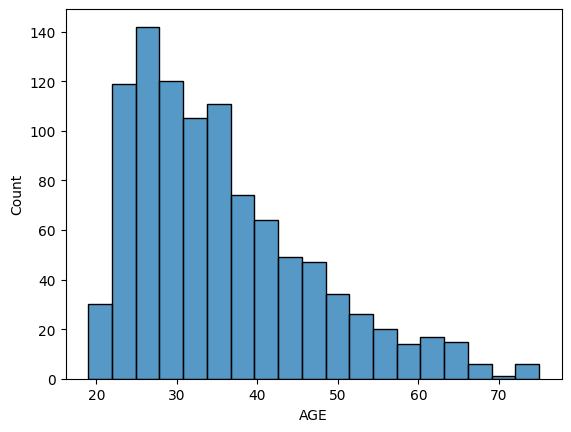

In [95]:
sns.histplot(df1.AGE)

> Age population is skewed right, with typical age in range 27 - 42. 

<AxesSubplot:xlabel='AMOUNT', ylabel='Count'>

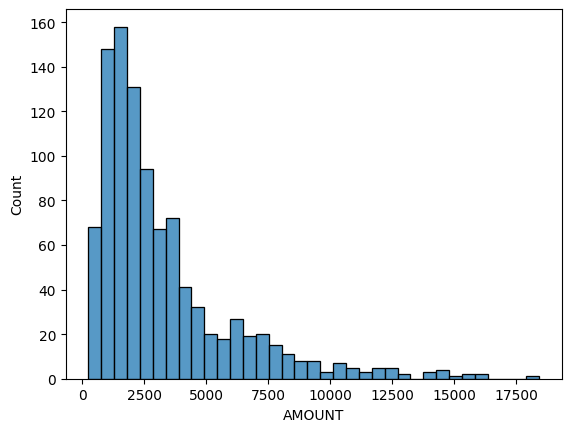

In [96]:
sns.histplot(df1.AMOUNT)

> Distribution of amount of the credits is skewed right, with typical amount in range from 1365 to 3972

<AxesSubplot:xlabel='DURATION', ylabel='Count'>

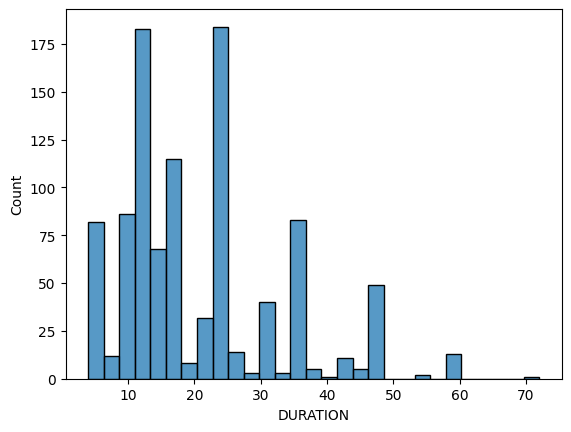

In [97]:
sns.histplot(df1.DURATION)

> Credit duration tend to be in whole year integer (12, 24, 36... months). Typical duration fall between 12 and 24 months.

## Correlation analysis

Text(0.5, 1.0, 'Correlation Heatmap')

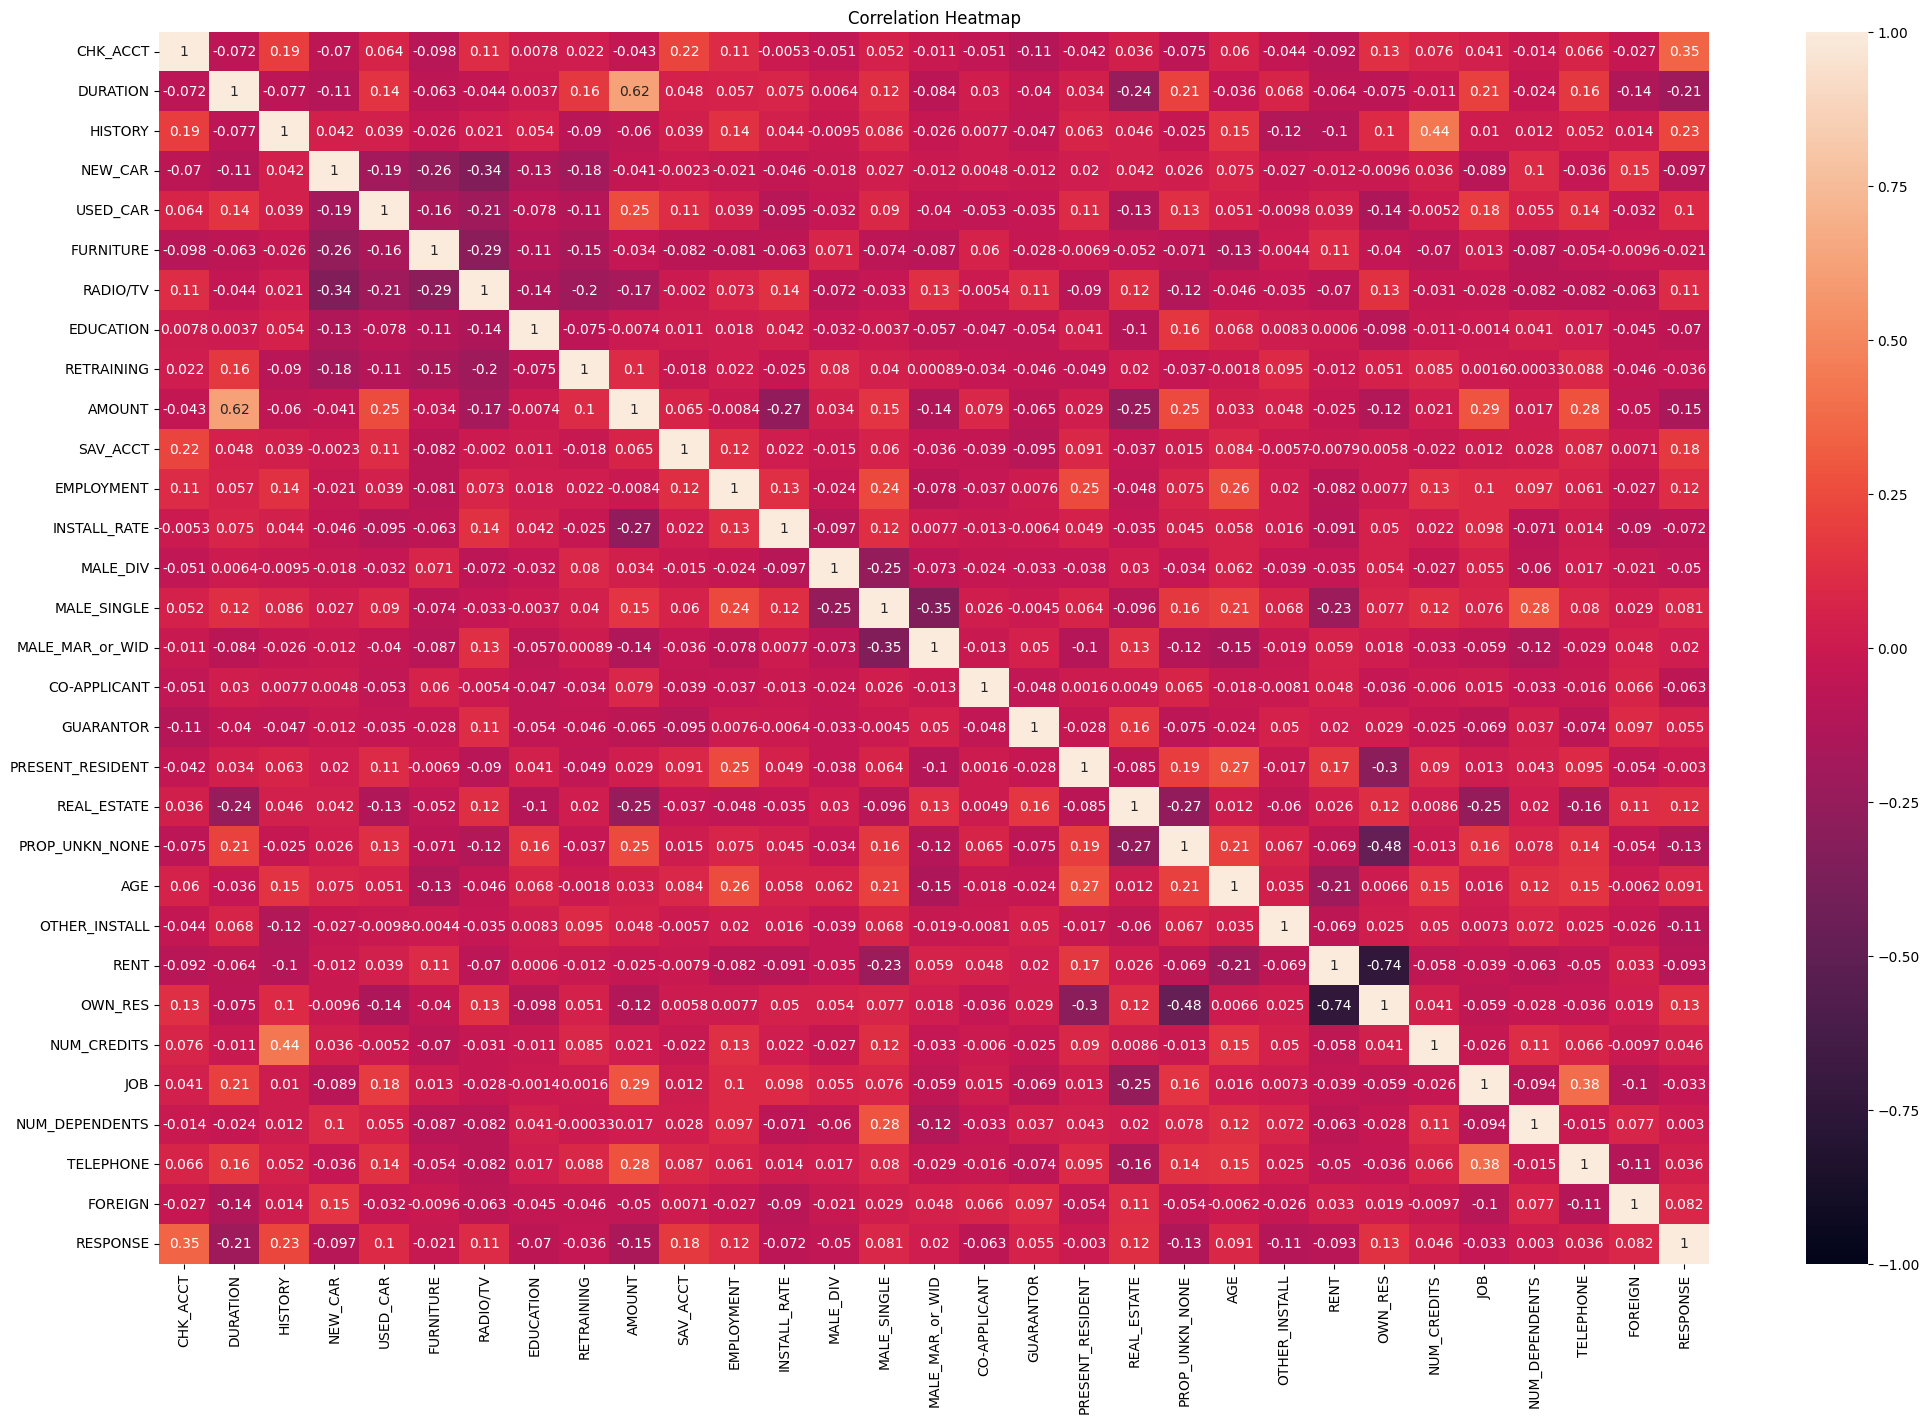

In [98]:
plt.figure(figsize=(25, 16))
map = sns.heatmap(df1.corr(), vmin=-1, vmax=1, annot=True)
plt.title("Correlation Heatmap")

> As expected, `RENT` and `OWN_RES` is highly negatively correlated since a person is either live in rent or own their housing (the only other option is that they have free housing, for e.g. studying aboard with full scholarship and accommodation)

> So we should remove one of them. Since `OWN_RES` is also negatively correlated with `PROP_UNKN_NONE` while `RENT` is not, `OWN_RES` is to be removed.

> `AMOUNT` and `DURATION` is positively correlated. But the correlation is not extremely strong and both variables are meaningful for the classification task, we keep both of them.

> Other notable correlations: (`NUM_CREDITS`, `HISTORY`), (`JOB`, `TELEPHONE`)

In [99]:
df1 = df1.drop(columns='OWN_RES')

## Standardization

In [100]:
# Detach the outcome column

df_outcome = df1["RESPONSE"]
df1_s = df1.drop(columns='RESPONSE')

In [101]:
df_outcome

0      1
1      0
2      1
3      1
4      0
      ..
995    1
996    1
997    1
998    0
999    1
Name: RESPONSE, Length: 1000, dtype: int64

In [102]:
# Subtract the mean, then divide by standard deviation
df1_s = (df1_s - df1_s.mean(axis=0)) / np.std(df1_s, axis = 0)

In [103]:
df1_s

,CHK_ACCT,DURATION,HISTORY,NEW_CAR,USED_CAR,FURNITURE,RADIO/TV,EDUCATION,RETRAINING,AMOUNT,SAV_ACCT,EMPLOYMENT,INSTALL_RATE,MALE_DIV,MALE_SINGLE,MALE_MAR_or_WID,CO-APPLICANT,GUARANTOR,PRESENT_RESIDENT,REAL_ESTATE,PROP_UNKN_NONE,AGE,OTHER_INSTALL,RENT,NUM_CREDITS,JOB,NUM_DEPENDENTS,TELEPHONE,FOREIGN
0,-1.254566,-1.236478,1.344014,-0.552705,-0.338862,-0.470108,1.603567,-0.229416,-0.327749,-0.745131,1.833169,1.338078,0.918477,-0.229416,0.908195,-0.318311,-0.206768,-0.234206,1.046987,1.595650,-0.426653,2.766456,-0.478018,-0.466933,1.027079,0.146949,-0.428290,1.214598,-0.196014
1,-0.459026,2.248194,-0.503428,-0.552705,-0.338862,-0.470108,1.603567,-0.229416,-0.327749,0.949817,-0.699707,-0.317959,-0.870183,-0.229416,-1.101086,-0.318311,-0.206768,-0.234206,-0.765977,1.595650,-0.426653,-1.191404,-0.478018,-0.466933,-0.704926,0.146949,-0.428290,-0.823318,-0.196014
2,1.132053,-0.738668,1.344014,-0.552705,-0.338862,-0.470108,-0.623610,4.358899,-0.327749,-0.416562,-0.699707,0.510060,-0.870183,-0.229416,0.908195,-0.318311,-0.206768,-0.234206,0.140505,1.595650,-0.426653,1.183312,-0.478018,-0.466933,-0.704926,-1.383771,2.334869,-0.823318,-0.196014
3,-1.254566,1.750384,-0.503428,-0.552705,-0.338862,2.127172,-0.623610,-0.229416,-0.327749,1.634247,-0.699707,0.510060,-0.870183,-0.229416,0.908195,-0.318311,-0.206768,4.269750,1.046987,-0.626704,-0.426653,0.831502,-0.478018,-0.466933,-0.704926,0.146949,2.334869,-0.823318,-0.196014
4,-1.254566,0.256953,0.420293,1.809283,-0.338862,-0.470108,-0.623610,-0.229416,-0.327749,0.566664,-0.699707,-0.317959,0.024147,-0.229416,0.908195,-0.318311,-0.206768,-0.234206,1.046987,-0.626704,2.343823,1.535122,-0.478018,-0.466933,1.027079,0.146949,2.334869,-0.823318,-0.196014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.132053,-0.738668,-0.503428,-0.552705,-0.338862,2.127172,-0.623610,-0.229416,-0.327749,-0.544162,-0.699707,0.510060,0.024147,-0.229416,-1.101086,-0.318311,-0.206768,-0.234206,1.046987,1.595650,-0.426653,-0.399832,-0.478018,-0.466933,-0.704926,-1.383771,-0.428290,-0.823318,-0.196014
996,-1.254566,0.754763,-0.503428,-0.552705,2.951057,-0.470108,-0.623610,-0.229416,-0.327749,0.207612,-0.699707,-0.317959,0.918477,4.358899,-1.101086,-0.318311,-0.206768,-0.234206,1.046987,-0.626704,-0.426653,0.391740,-0.478018,-0.466933,-0.704926,1.677670,-0.428290,1.214598,-0.196014
997,1.132053,-0.738668,-0.503428,-0.552705,-0.338862,-0.470108,1.603567,-0.229416,-0.327749,-0.874503,-0.699707,1.338078,0.918477,-0.229416,0.908195,-0.318311,-0.206768,-0.234206,1.046987,-0.626704,-0.426653,0.215835,-0.478018,-0.466933,-0.704926,0.146949,-0.428290,-0.823318,-0.196014
998,-1.254566,1.999289,-0.503428,-0.552705,-0.338862,-0.470108,1.603567,-0.229416,-0.327749,-0.505528,-0.699707,-0.317959,0.918477,-0.229416,0.908195,-0.318311,-0.206768,-0.234206,1.046987,-0.626704,2.343823,-1.103451,-0.478018,-0.466933,-0.704926,0.146949,-0.428290,1.214598,-0.196014


## PCA

In [104]:
import sklearn.decomposition

In [105]:
pca = sklearn.decomposition.PCA()
pca.fit(df1_s)
print("Explained variance:")
print(pca.explained_variance_)
print("Proportional variance:")
print(pca.explained_variance_ratio_)
print("Cummulative proportion of variance")
print(np.cumsum(pca.explained_variance_ratio_))

Explained variance:
[2.89249271 2.15642191 1.70253839 1.48831597 1.42918642 1.32971081
 1.24694331 1.21636828 1.20876886 1.14004309 1.09076644 1.05282153
 0.97668037 0.93304101 0.89505282 0.86254859 0.82167861 0.80931023
 0.78151905 0.73941698 0.69490738 0.66454178 0.60311392 0.53928629
 0.51972899 0.480331   0.43509278 0.25237813 0.0660234 ]
Proportional variance:
[0.09964139 0.07428502 0.05864951 0.05126992 0.04923301 0.04580624
 0.04295505 0.04190179 0.04164    0.03927252 0.03757502 0.03626789
 0.03364495 0.03214165 0.03083303 0.02971331 0.02830541 0.02787934
 0.02692198 0.02547164 0.02393836 0.02289232 0.02077623 0.01857748
 0.01790377 0.01654657 0.0149882  0.00869399 0.00227439]
Cummulative proportion of variance
[0.09964139 0.1739264  0.23257592 0.28384583 0.33307884 0.37888509
 0.42184013 0.46374192 0.50538193 0.54465445 0.58222947 0.61849736
 0.65214231 0.68428397 0.71511699 0.7448303  0.77313571 0.80101506
 0.82793704 0.85340868 0.87734704 0.90023936 0.9210156  0.93959308
 0.9

> PCA shows that we should not further discard any variable.

# Model exploration, training and evaluation

Split the dataset into training and test set with ratio of 7:3.

In [106]:
import sklearn.model_selection

In [107]:
testsize = 0.3
pred_train, pred_test, out_train, out_test = sklearn.model_selection.train_test_split(df1_s, df_outcome, test_size = testsize, random_state = 0)

In [108]:
pred_train

,CHK_ACCT,DURATION,HISTORY,NEW_CAR,USED_CAR,FURNITURE,RADIO/TV,EDUCATION,RETRAINING,AMOUNT,SAV_ACCT,EMPLOYMENT,INSTALL_RATE,MALE_DIV,MALE_SINGLE,MALE_MAR_or_WID,CO-APPLICANT,GUARANTOR,PRESENT_RESIDENT,REAL_ESTATE,PROP_UNKN_NONE,AGE,OTHER_INSTALL,RENT,NUM_CREDITS,JOB,NUM_DEPENDENTS,TELEPHONE,FOREIGN
105,-0.459026,0.256953,1.344014,-0.552705,-0.338862,-0.470108,-0.623610,-0.229416,-0.327749,3.071869,-0.699707,-0.317959,-0.870183,-0.229416,0.908195,-0.318311,4.836346,-0.234206,0.140505,-0.626704,-0.426653,0.303788,-0.478018,-0.466933,1.027079,1.677670,2.334869,1.214598,-0.196014
68,1.132053,1.252574,-0.503428,-0.552705,-0.338862,-0.470108,-0.623610,4.358899,-0.327749,-0.514743,-0.699707,-0.317959,0.918477,-0.229416,0.908195,-0.318311,-0.206768,-0.234206,1.046987,-0.626704,2.343823,0.127883,2.091971,-0.466933,-0.704926,0.146949,-0.428290,1.214598,-0.196014
479,-1.254566,-0.489762,1.344014,-0.552705,-0.338862,2.127172,-0.623610,-0.229416,-0.327749,-0.635608,-0.699707,1.338078,0.918477,-0.229416,0.908195,-0.318311,-0.206768,-0.234206,1.046987,-0.626704,-0.426653,0.743550,-0.478018,-0.466933,1.027079,0.146949,2.334869,1.214598,-0.196014
399,1.132053,0.256953,1.344014,-0.552705,-0.338862,-0.470108,1.603567,-0.229416,-0.327749,-0.622140,1.199950,-0.317959,0.918477,-0.229416,-1.101086,-0.318311,-0.206768,-0.234206,-1.672459,1.595650,-0.426653,0.655598,-0.478018,-0.466933,1.027079,-1.383771,-0.428290,-0.823318,-0.196014
434,-1.254566,-0.987573,-0.503428,-0.552705,-0.338862,2.127172,-0.623610,-0.229416,-0.327749,-0.402385,-0.699707,-0.317959,0.024147,-0.229416,0.908195,-0.318311,-0.206768,-0.234206,-0.765977,1.595650,-0.426653,-0.927547,-0.478018,-0.466933,-0.704926,0.146949,-0.428290,-0.823318,-0.196014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,-1.254566,-0.738668,-2.350870,1.809283,-0.338862,-0.470108,-0.623610,-0.229416,-0.327749,-0.775968,-0.699707,-0.317959,0.918477,-0.229416,0.908195,-0.318311,-0.206768,-0.234206,1.046987,-0.626704,-0.426653,1.095360,2.091971,-0.466933,1.027079,0.146949,-0.428290,-0.823318,-0.196014
192,-0.459026,0.505858,-0.503428,-0.552705,-0.338862,-0.470108,-0.623610,-0.229416,3.051111,0.228170,-0.699707,-0.317959,0.918477,-0.229416,0.908195,-0.318311,-0.206768,-0.234206,-0.765977,-0.626704,-0.426653,0.039930,-0.478018,-0.466933,-0.704926,0.146949,2.334869,1.214598,-0.196014
629,1.132053,-0.987573,-0.503428,-0.552705,-0.338862,-0.470108,-0.623610,4.358899,-0.327749,0.198751,1.833169,1.338078,-1.764514,-0.229416,0.908195,-0.318311,-0.206768,-0.234206,1.046987,1.595650,-0.426653,2.502599,-0.478018,-0.466933,-0.704926,-1.383771,-0.428290,-0.823318,-0.196014
559,-0.459026,-0.240857,1.344014,-0.552705,-0.338862,2.127172,-0.623610,-0.229416,-0.327749,-0.476109,-0.699707,-1.145978,-0.870183,-0.229416,0.908195,-0.318311,-0.206768,-0.234206,-0.765977,1.595650,-0.426653,-0.399832,-0.478018,-0.466933,1.027079,-1.383771,-0.428290,-0.823318,-0.196014


In [109]:
print(f'The training set contains {out_train.sum()} positive cases and {len(df1_s)*(1-testsize) - out_train.sum()} negative cases') 

The training set contains 486 positive cases and 214.0 negative cases


## K nearest neighbors

In [110]:
import sklearn.metrics

In [111]:
import sklearn.neighbors

In [112]:
model_knn = sklearn.neighbors.KNeighborsClassifier()
model_knn.fit(pred_train, out_train)

KNeighborsClassifier()

In [113]:
out_pred = model_knn.predict(pred_test)

In [114]:
score_knn = sklearn.metrics.f1_score(out_test, out_pred)
print (f"f1 score: {score_knn}")

f1 score: 0.8070953436807095


## Logistic regression

In [115]:
import sklearn.linear_model

model_log = sklearn.linear_model.LogisticRegression(random_state=0)
model_log.fit(pred_train, out_train)

print("coefficients:", model_log.coef_)
print("intercept:", model_log.intercept_)

coefficients: [[ 0.7230655  -0.37073699  0.48643818 -0.21567313  0.4561277   0.16189255
   0.12888213 -0.04645961 -0.00327451 -0.3288736   0.3828049   0.1789312
  -0.34324851 -0.10275385  0.14885752 -0.01619849 -0.13072307  0.22515744
   0.01489056  0.27526042 -0.11409005  0.06490658 -0.18206476 -0.26509399
  -0.17315594 -0.09888293 -0.13257513  0.29595781  0.28811767]]
intercept: [1.1927925]


In [116]:
out_pred = model_log.predict(pred_test)

In [117]:
score_log = sklearn.metrics.f1_score(out_test, out_pred)
print (f"f1 score: {score_log}")

f1 score: 0.8411214953271028


## Random forest

In [118]:
import sklearn.ensemble

In [119]:
model_rr = sklearn.ensemble.RandomForestClassifier(random_state=0, n_estimators=75)
model_rr.fit(pred_train, out_train)

RandomForestClassifier(n_estimators=75, random_state=0)

In [120]:
out_pred = model_rr.predict(pred_test)

In [121]:
score_rr = sklearn.metrics.f1_score(out_test, out_pred)
print (f"f1 score: {score_rr}")

f1 score: 0.8533333333333333


## Neural network

In [122]:
import sklearn.neural_network

In [138]:
model_nn = sklearn.neural_network.MLPClassifier(activation='identity', hidden_layer_sizes=(90, 90, 90, 90, 90))
model_nn.fit(pred_train, out_train)

MLPClassifier(activation='identity', hidden_layer_sizes=(90, 90, 90, 90, 90))

In [139]:
out_pred = model_nn.predict(pred_test)

In [140]:
score_nn = sklearn.metrics.f1_score(out_test, out_pred)
print (f"f1 score: {score_nn}")

f1 score: 0.8452655889145497


# Model performance comparison

Compute correlation coeffs between models' prediction

In [126]:
df_eval = pd.DataFrame([model_knn.predict(pred_test), model_log.predict(pred_test), model_nn.predict(pred_test), model_rr.predict(pred_test)])
df_eval = df_eval.T
df_eval

,0,1,2,3
0,0,0,0,0
1,1,1,1,1
2,1,1,1,1
3,1,1,1,1
4,1,0,1,1
...,...,...,...,...
295,1,1,1,1
296,1,0,0,0
297,0,1,1,1
298,0,0,0,0


In [141]:
print (f"f1 score:")
print (f"k nearest neighbors: {score_knn}")
print (f"logistic regression: {score_log}")
print (f"random forest: {score_rr}")
print (f"neural network: {score_nn}")

f1 score:
k nearest neighbors: 0.8070953436807095
logistic regression: 0.8411214953271028
random forest: 0.8533333333333333
neural network: 0.8452655889145497


In [128]:
df_eval.corr()

,0,1,2,3
0,1.000000,0.415159,0.425778,0.350797
1,0.415159,1.000000,0.934466,0.659527
2,0.425778,0.934466,1.000000,0.653846
3,0.350797,0.659527,0.653846,1.000000


> Result from logistic regression and neural network are highly correlated.

> From each individual models, we can rank their performance as: Random Forest > Neural network > Logistic regression > K Nearest Neighbours

## Ensemble

Now we attempt to create an ensemble using K nearest neighbors, neural network, random forest. Logistic regression is excluded as it is highly correlated with neural network

In [129]:
m_knn = sklearn.neighbors.KNeighborsClassifier()
m_nn = sklearn.neural_network.MLPClassifier(activation='identity', hidden_layer_sizes=(90, 90, 90, 90, 90))
m_rr =  sklearn.ensemble.RandomForestClassifier(random_state=0, n_estimators=75)
model_e = sklearn.ensemble.VotingClassifier([('knn', m_knn), ('log', m_nn), ('rr', m_rr)])
model_e.fit(pred_train, out_train)

VotingClassifier(estimators=[('knn', KNeighborsClassifier()),
                             ('log',
                              MLPClassifier(activation='identity',
                                            hidden_layer_sizes=(90, 90, 90, 90,
                                                                90))),
                             ('rr',
                              RandomForestClassifier(n_estimators=75,
                                                     random_state=0))])

In [130]:
out_pred = model_e.predict(pred_test)

print (f"f1 score: {sklearn.metrics.f1_score(out_test, out_pred)}")

f1 score: 0.8532731376975169


> The ensemble's performance is slightly lower than the most accurate component, random forest, and higher than the other 2.

# Some visualization using the ensemble's prediction

In [131]:
##df_p = df.loc[:,[col for col in df.columns if (col != "OBS#" and col != "RESPONSE" and col != "OWN_RES")]]

##out_pred = model_e.predict(df_p)

In [132]:
out_pred = model_e.predict(df1_s)

In [133]:
df["PRED_RESPONSE"] = out_pred

Text(0.5, 1.0, 'Classification of credit in relation to DURATION and AGE')

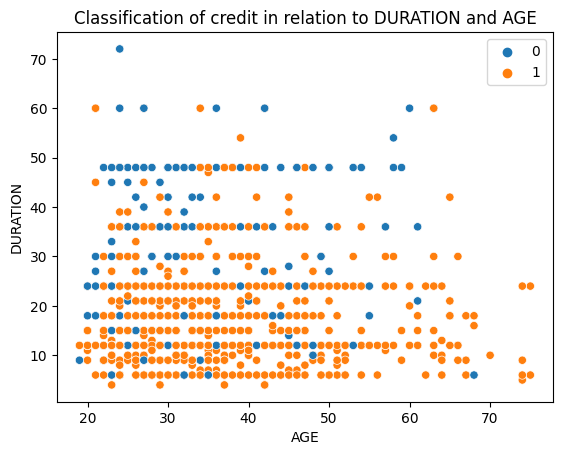

In [134]:
sns.scatterplot(x=df["AGE"], y=df["DURATION"], hue=out_pred)
plt.title("Classification of credit in relation to DURATION and AGE")

> Credit with lower duration tend to be good

Text(0.5, 1.0, 'Classification of credit in relation to DURATION and AMOUNT')

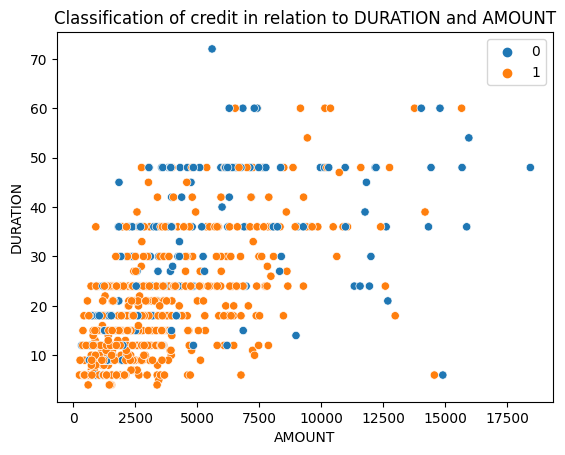

In [135]:
sns.scatterplot(x=df["AMOUNT"], y=df["DURATION"], hue=out_pred)
plt.title("Classification of credit in relation to DURATION and AMOUNT")

> Credit with lower duration and amount tend to be good

In [136]:
array_purpose = []
for col in ["NEW_CAR", "USED_CAR", "FURNITURE", "RADIO/TV", "EDUCATION", "RETRAINING"]:
    s = df.loc[df[col] == 1]["PRED_RESPONSE"].sum()
    array_purpose.append([len(df.loc[df[col] == 1]) - s, s])
array_purpose

[[72, 162], [5, 98], [43, 138], [40, 240], [18, 32], [29, 68]]

Text(0.5, 1.0, 'Bar plot showing the classification of credit over credit purpose')

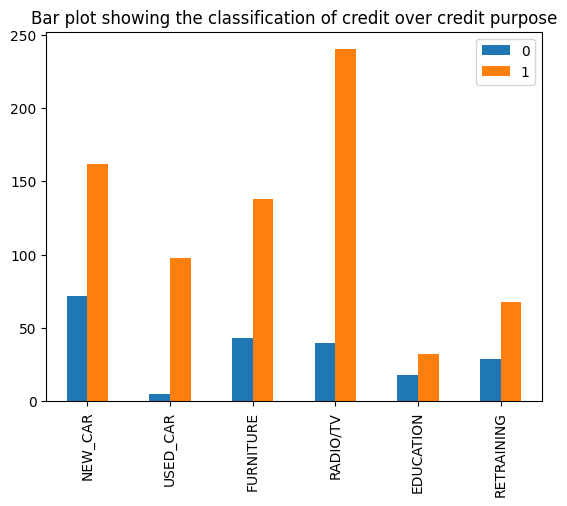

In [137]:
df_purpose = pd.DataFrame(array_purpose, columns=["0", "1"], index=["NEW_CAR", "USED_CAR", "FURNITURE", "RADIO/TV", "EDUCATION", "RETRAINING"])
df_purpose.plot(kind="bar")
plt.title("Bar plot showing the classification of credit over credit purpose")

> Credit applied to buy used car is almost always good

> Credit applied for education is the most risky out of all purposes